In [1]:
%matplotlib inline

In [167]:
import dt_lightcurve as dt

In [186]:
lc = dt.kepler_id_to_lc(11446443).stitch()

In [187]:
lc = lc[lc.time.value<300]

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

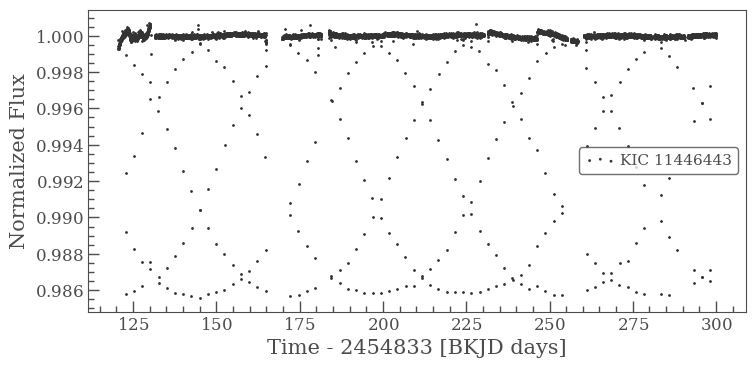

In [222]:
lc.scatter()

In [190]:
dt_obj = dt.DeepTransit(lc, is_flatten=False)

In [223]:
bboxes = dt_obj.transit_detection('model/Model_Kepler.pth', batch_size=3)

Loading Model: model/Model_Kepler.pth


10it [00:14,  1.42s/it]                      


In [8]:
import matplotlib.pyplot as plt

(200.0, 230.0)

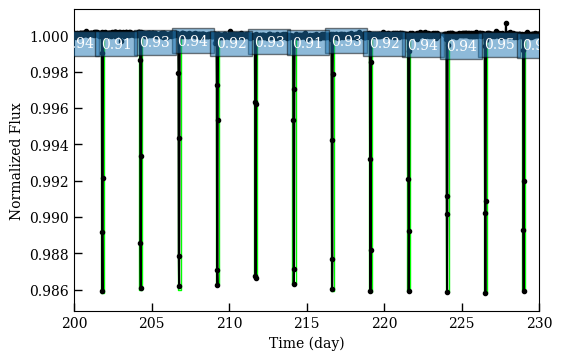

In [224]:
fig, ax = plt.subplots(dpi=100)
ax = dt.plot_lc_with_bboxes(lc, bboxes, ax=ax, color='k', marker='.')
ax.set_xlim([200, 230])

Let me calculate the statistical values.

In [159]:
width = bboxes[:, 3]
height = bboxes[:, 4]

(0.0, 0.05)

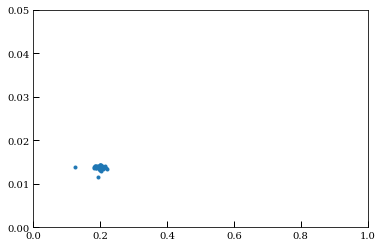

In [166]:
plt.plot(width, height, '.')
plt.xlim(0, 1)
plt.ylim(0, 0.05)

Firstly, since we have all the transits, let's calculate their periods.

(0.0, 7.0)

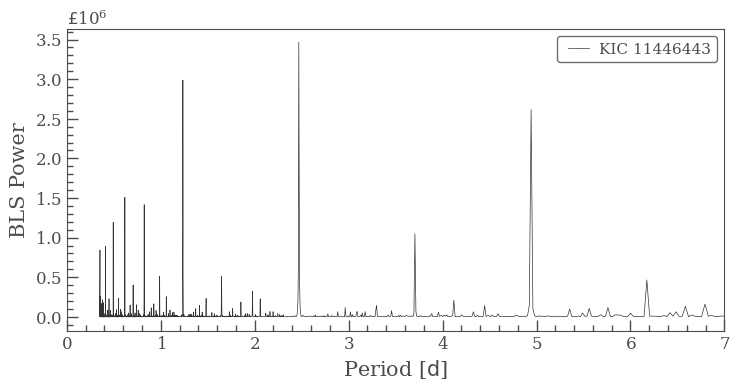

In [44]:
ax = lc.to_periodogram('bls', frequency_factor=500).plot()
ax.set_xlim(0, 7)

In [217]:
logic = False
for box in bboxes:
    logic = logic|(lc.time.value>(box[1]-box[3]/2))&(lc.time.value<(box[1]+box[3]/2))

In [210]:
lc[logic]

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
120.5391194434851,9.9974704e-01,4.1455238e-05,0,9.670235e-04,621.21892,848.89510,568,4.0139259e+05,1.6694973e+01,2.5969946e+03,5.7512480e-01,4.0606328e+05,1.6837709e+01,0,nan,nan,nan,nan,621.21892,3.7738188e-05,848.89510,5.2353815e-05,3.1265066e-04,-2.7012741e-03
120.55955370047741,9.9934155e-01,4.1302406e-05,0,9.676805e-04,621.21903,848.89480,569,4.0127341e+05,1.6692719e+01,2.5945186e+03,5.7482362e-01,4.0589859e+05,1.6775635e+01,0,nan,nan,nan,nan,621.21903,3.7746133e-05,848.89480,5.2364619e-05,5.6086341e-04,-2.9761354e-03
120.57998785741074,9.9945283e-01,4.1485837e-05,0,9.683374e-04,621.21916,848.89509,570,4.0132431e+05,1.6693634e+01,2.5934338e+03,5.7448274e-01,4.0594378e+05,1.6850138e+01,0,nan,nan,nan,nan,621.21916,3.7747533e-05,848.89509,5.2350984e-05,6.7414675e-04,-2.5876898e-03
120.60042221433832,9.9928403e-01,4.1305815e-05,10000000,9.689943e-04,621.21954,848.89527,571,4.0129984e+05,1.6693468e+01,2.5962300e+03,5.7479972e-01,4.0587522e+05,1.6777020e+01,10000000,nan,nan,nan,nan,621.21954,3.7748057e-05,848.89527,5.2364372e-05,1.1631118e-03,-2.6377398e-03
120.62085647121421,9.9939001e-01,4.1409166e-05,0,9.696512e-04,621.21989,848.89547,572,4.0134972e+05,1.6694208e+01,2.5949690e+03,5.7516509e-01,4.0591828e+05,1.6818996e+01,0,nan,nan,nan,nan,621.21989,3.7743641e-05,848.89547,5.2348852e-05,1.4143374e-03,-2.3378779e-03
120.64129062808934,9.9935520e-01,4.1356790e-05,0,9.703081e-04,621.21999,848.89610,573,4.0132694e+05,1.6693768e+01,2.5959238e+03,5.7458931e-01,4.0590412e+05,1.6797724e+01,0,nan,nan,nan,nan,621.21999,3.7746278e-05,848.89610,5.2385014e-05,1.5965897e-03,-1.9867572e-03
120.66172488489974,9.9938750e-01,4.1428382e-05,10000000,9.709649e-04,621.22029,848.89569,574,4.0131862e+05,1.6693893e+01,2.5943230e+03,5.7458967e-01,4.0591725e+05,1.6826801e+01,10000000,nan,nan,nan,nan,621.22029,3.7749101e-05,848.89569,5.2353444e-05,1.7936645e-03,-2.1780455e-03
120.68215924171818,9.9930614e-01,4.1313400e-05,0,9.716217e-04,621.22020,848.89586,575,4.0131303e+05,1.6693476e+01,2.5926799e+03,5.7484448e-01,4.0588422e+05,1.6780100e+01,0,nan,nan,nan,nan,621.22020,3.7744772e-05,848.89586,5.2354055e-05,1.7307586e-03,-2.0547889e-03


<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

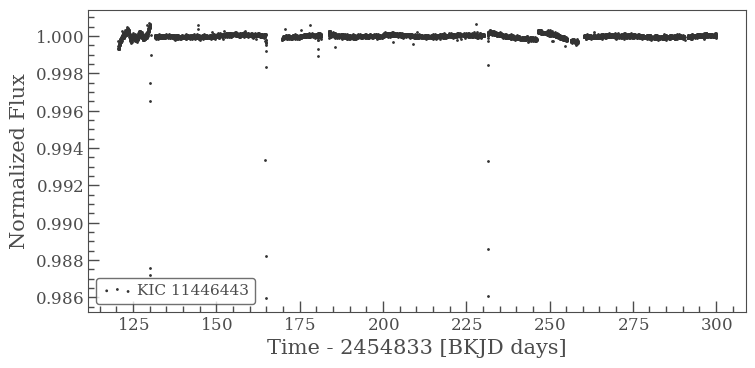

In [219]:
lc[~logic].scatter()

(0.0, 7.0)

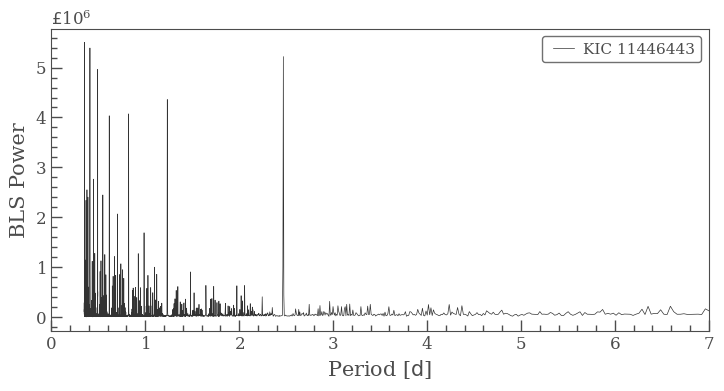

In [155]:
ax = lc[logic].to_periodogram('bls', frequency_factor=500).plot()
ax.set_xlim(0, 7)

In [11]:
import numpy as np

In [115]:
def delta_model(theta, t):
    return (t-t[0]) // theta * theta + t[0] - t, (t[-1] - t[0]) // theta

In [13]:
x = np.linspace(1, 100, 50)
y = delta_model(x, 0, 3)

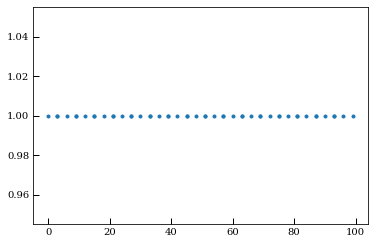

In [14]:
plt.plot(y, np.ones(y.size), '.')

In [47]:
np.sort(bboxes[:, 1])

array([122.76258495, 125.2357452 , 127.70768702, 132.65322914,
       135.12374982, 137.58495967, 140.06083022, 142.5266016 ,
       145.00126936, 147.47713604, 149.94647284, 152.41441211,
       154.893105  , 157.35769229, 159.82660719, 162.28600819,
       172.17809076, 174.65187416, 177.11919058, 179.58977094,
       184.53904675, 187.00739281, 189.47979348, 191.9547493 ,
       194.41813837, 196.88205253, 199.36073519, 201.82316893,
       204.29872663, 206.77035981, 209.23571587, 211.70450343,
       214.19166579, 216.64951491, 219.12309888, 221.59243694,
       224.06177911, 226.53636961, 229.01307628, 233.95261524,
       236.42512815, 238.89132881, 241.35466117, 243.83515673,
       246.30092881, 248.77364934, 251.23992941, 253.70513364,
       261.12110344, 263.59184693, 266.06187123, 268.53406706,
       271.00650483, 273.47121761, 275.94262475, 278.41602937,
       283.34598689, 285.83241639, 288.29302028, 293.22749874,
       295.71148137, 298.17624614])

In [124]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[int(result.size/2):]

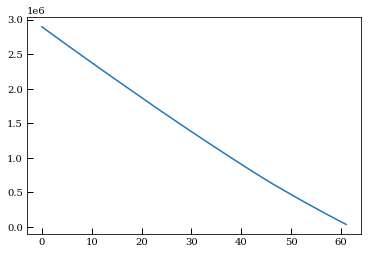

In [126]:
plt.plot(autocorr(np.sort(bboxes[:, 1])))

In [158]:
np.diff(np.sort(bboxes[:, 1]))

2.471633182969242

In [22]:
import scipy.optimize as optimization

In [92]:
print(optimization.leastsq(delta_model, 2.5, args=(np.sort(bboxes[:, 1]))))

(array([2.47316026]), 2)


In [93]:
optimization.least_squares(delta_model, 5, args=(np.sort(bboxes[:, 1]),) )

 active_mask: array([0.])
        cost: 31011.12653441057
         fun: array([35.        , 32.52683975, 34.99780817, 34.99517629, 32.52465561,
       30.06344577, 32.53048546, 30.06471408, 32.53295656, 30.05708988,
       32.53066332, 30.06272405, 32.52694141, 30.06235411, 32.53634946,
       30.07694845, 30.07068637, 32.53981321, 30.07249679, 32.54482668,
       32.53846111, 30.07011505, 32.54062462, 30.0656688 , 32.54518997,
       30.08127581, 32.54550339, 30.08306965, 32.55042219, 30.07878901,
       32.5563432 , 30.08755563, 32.54330351, 30.0854544 , 32.55478067,
       30.08544262, 32.55901068, 30.08442018, 32.55062375, 32.55399504,
       30.08148213, 32.55819171, 30.09485935, 32.55727403, 30.09150196,
       32.56169167, 30.09541159, 32.57311761, 30.10005805, 32.57222481,
       30.10220051, 32.57291491, 30.10047715, 32.5786746 , 30.10726747,
       32.57677309, 32.58972581, 30.10329631, 32.58560266, 32.59403445,
       30.11005182, 32.58819729])
        grad: array([33117.668

In [114]:
np.sum(delta_model(2.2, np.sort(bboxes[:, 1]))**2)

97.85151120490713

In [106]:
slice(-4, 4, 0.25)

slice(-4, 4, 0.25)

In [116]:
chi2 = []
n=[]
for p in np.linspace(0, 10, 100):
    chi2.append(np.sum(delta_model(p, bboxes[:, 1])[0]**2))
    n.append(delta_model(p, bboxes[:, 1])[1]) 

(0.0, 20.0)

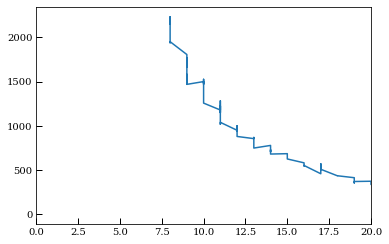

In [118]:
plt.plot(n, chi2)
plt.xlim(0, 20)

ACF can be an alternative for me?